<a href="https://colab.research.google.com/github/universeatmyfeet/Machine_Learning/blob/master/Gradient_Descent_for_Uni_Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent**

# **One Variable**

In [0]:

import pandas as pd

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/UtkarshPathrabe/Machine-Learning-Stanford-University-Coursera/master/Programming%20Exercises/machine-learning-ex1/ex1/ex1data1.txt')

In [0]:
data.columns = ['Population','Profit']

In [4]:
#data.describe()
data.head()

,Population,Profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [5]:
data.describe()

,Population,Profit
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


In [0]:
import numpy as np
X = data.iloc[:, 0].values
X_new = np.c_[np.ones((len(X),1)),X]#adding exta ones to accomodate theta0
y = np.c_[data.iloc[:,1]]#np.c_to convert 1D to 2D

In [0]:
X= X.reshape(96,1)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

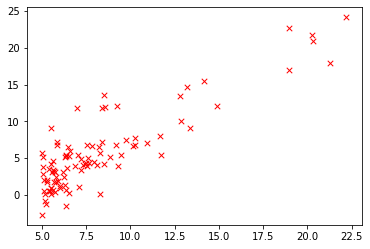

In [9]:
plt.scatter(X,y,c = 'r',s = 30,marker = 'x',linewidth = 1)

In [0]:
def normal_method(X,y):
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  y_pred = X.dot(theta)
  return y_pred,theta

In [0]:
predicted,best_theta = normal_method(X_new,y)

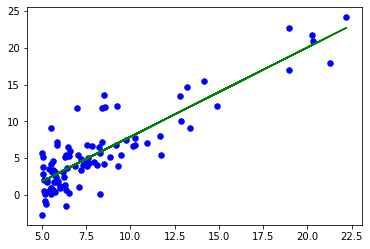

In [12]:
plt.scatter(X,y,c = 'b',s = 30,marker = 'o',linewidth = 1)
plt.plot(X,predicted,'g-')#'-' makes it a line

In [13]:
best_theta

array([[-4.21150401],
       [ 1.21354725]])

In [0]:
m = y.size
def calc_cost(X,y,theta):
   cost = 0
   pred = X.dot(theta)
   cost = (np.sum(np.square(pred - y)))/(2*m)
   return cost


In [15]:
theta = [[0],[0]]
calc_cost(X_new, y, theta)

30.79495785534583

In [0]:
def gradient_descent(X,y,theta,alpha = 0.01,iters = 1000):
  cost_history = []
  theta_history = []
  for it in range(iters):
    pred = X.dot(theta)
    theta = theta - ((alpha/m)*(X.T.dot(pred - y)))
    cost_history.append(calc_cost(X,y,theta))
    theta_history.append(theta)
  return theta,cost_history,theta_history 


In [0]:
iterations = 1500
theta,cost_history,theta_history = gradient_descent(X_new,y,theta,0.02,iterations)



In [18]:
print("theta 0 : {}\ntheta1 : {}\nMin Cost : {}".format(theta[0],theta[1],cost_history[-1]))


theta 0 : [-4.19265464]
theta1 : [1.21165934]
Min Cost : 3.45961430702625


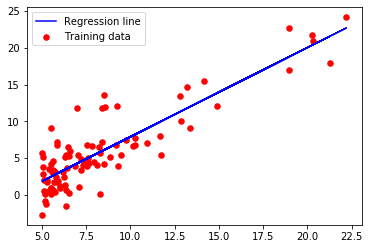

In [19]:
plt.scatter(X,y,c = 'r',s = 30,marker = 'o',linewidth = 1)
plt.plot(X,X_new.dot(theta),'b-')
plt.legend(['Regression line','Training data'])

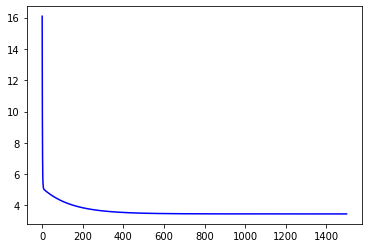

In [20]:
plt.plot(range(iterations),cost_history,'b-')# alpha - 0.01 goes slower than 0.02

### **Plotting GD with different alphas and iterations**

In [0]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_new.dot(theta)
        theta,h,_ = gradient_descent(X_new,y,theta,lr,1)
        pred = X_new.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

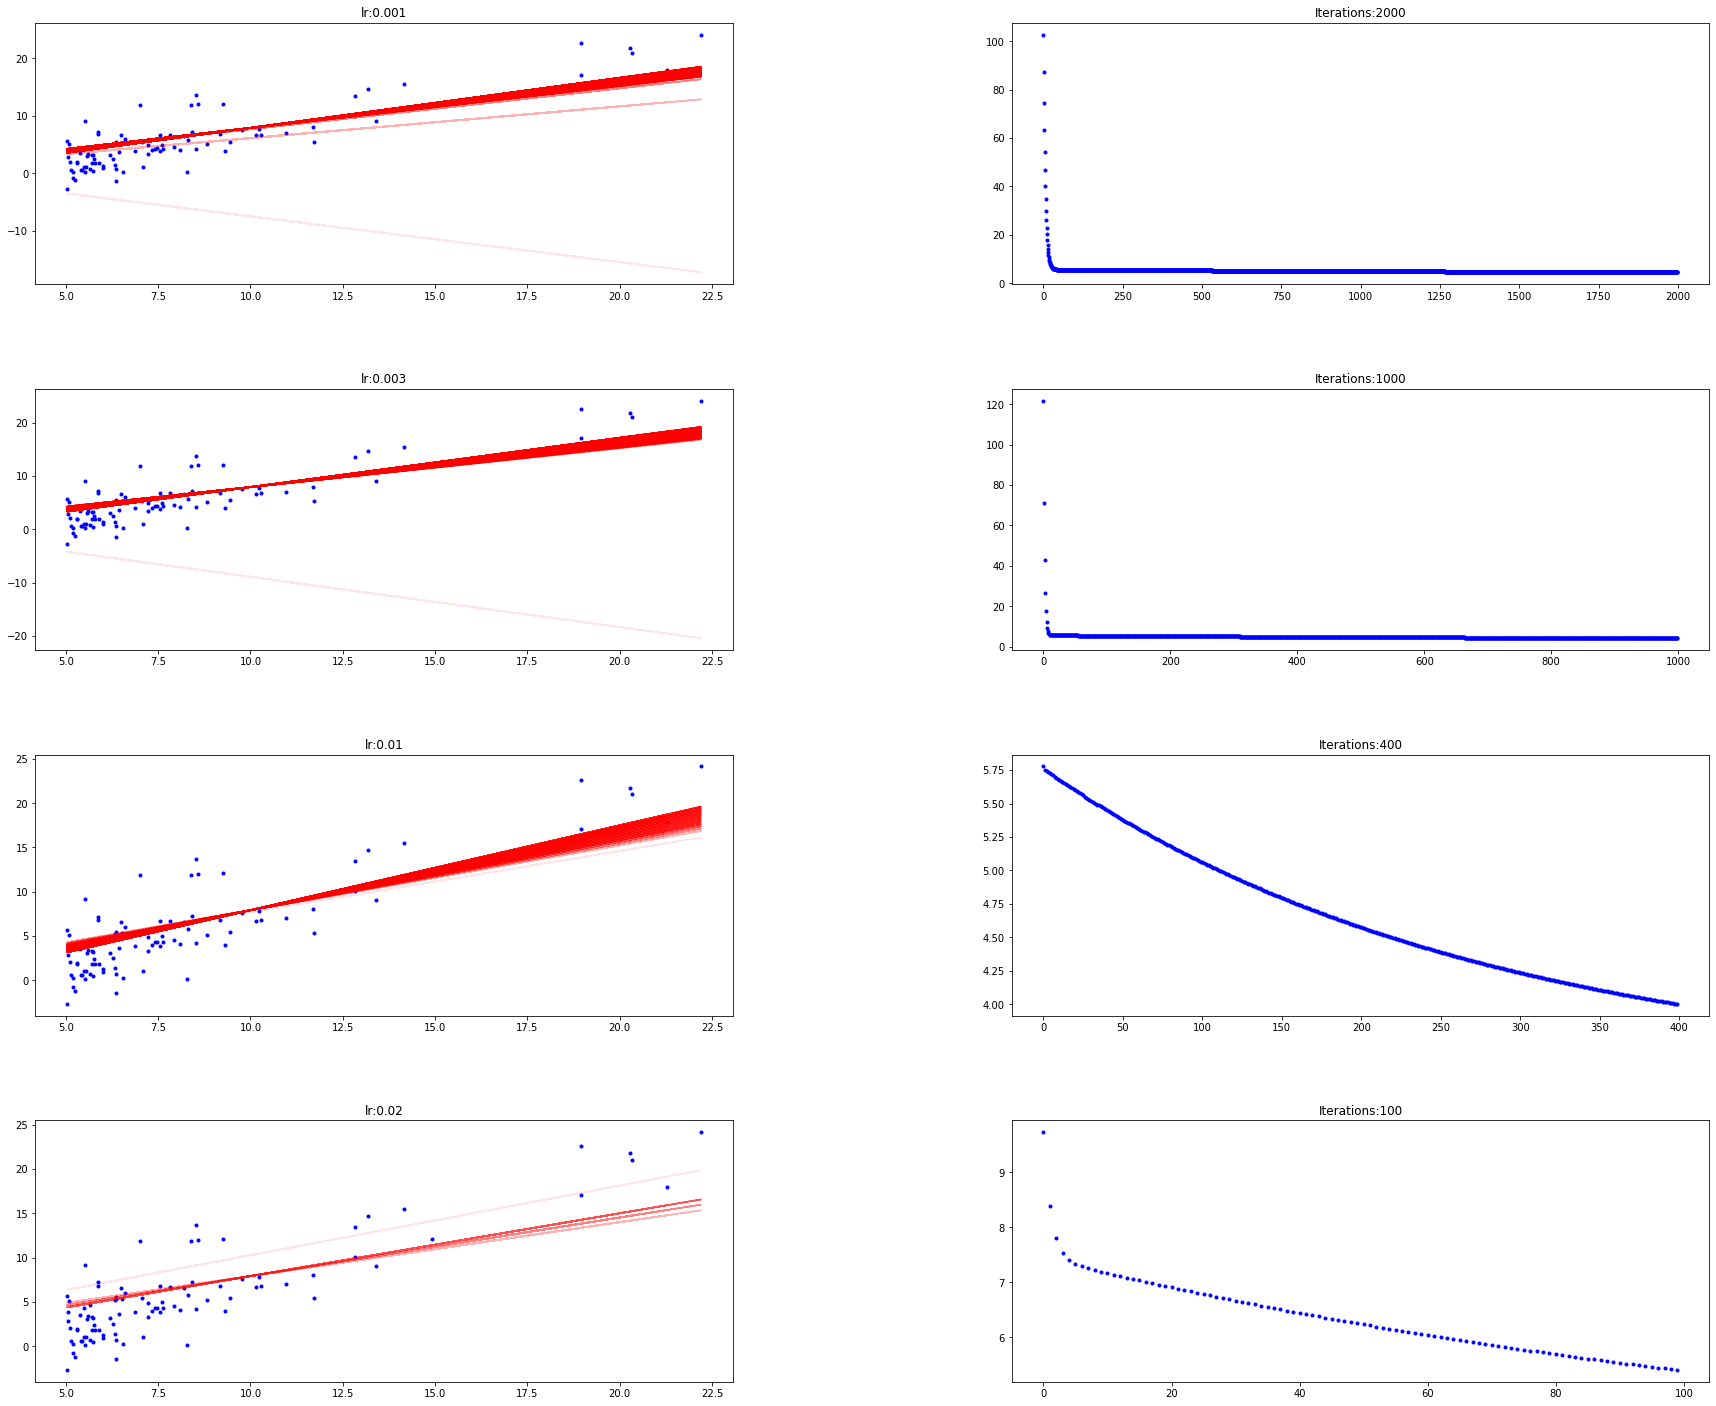

In [22]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(1000,0.003),(400,0.01),(100,0.02)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

In [23]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of [481.53044786]

For population = 70,000, we predict a profit of [42889.60729083]



In [0]:
theta0vals = np.linspace(-10,10,100)#creates 100 values btw -10 and 10
theta1vals = np.linspace(-1,4,100)
#xx, yy = np.meshgrid(theta0vals, theta1vals, indexing='xy')
J_vals = np.zeros((theta0vals.shape[0],theta1vals.shape[0]))

for i,theta0 in enumerate(theta0vals):#enumerate gives counter,item over a iterable object
  for j,theta1 in enumerate(theta1vals):
    J_vals[i,j] = calc_cost(X_new,y,[theta0, theta1])

J_vals = J_vals.T

Text(0.5, 0.92, 'Surface')

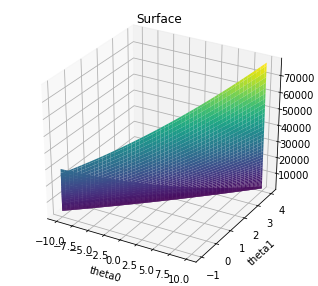

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(121,projection='3d')# 121 means 1*2 dim and 1rst subplot
ax.plot_surface(theta0vals,theta1vals,J_vals,cmap='viridis')

plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

#ax = plt.subplot(122)
#ax.contour(xx, yy, J_vals, rstride=1, cstride=1, alpha=0.6, cmap='viridis')
#plt.xlabel('theta0')
#plt.ylabel('theta1')
#plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
#plt.title('Contour, showing minimum')


# **Multivariate**

In [0]:
data2= pd.read_csv('https://raw.githubusercontent.com/UtkarshPathrabe/Machine-Learning-Stanford-University-Coursera/master/Programming%20Exercises/machine-learning-ex1/ex1/ex1data2.txt')

In [0]:
data2.columns = ['Size','Bedrooms','Price']

In [28]:
data2.head()

,Size,Bedrooms,Price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [29]:
data2.describe()

,Size,Bedrooms,Price
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


In [0]:
X1 = data2.iloc[:,:2]
y1 = np.c_[data2.iloc[:,2]]

In [0]:
m = y1.size # standardizing because size and no of bedrooms have a large difference in ranges ; converting to Gaussian distribution
mean = np.zeros(X.shape[1])
sd = np.zeros(X.shape[1])
def norm(X):
 
    X_norm = X.copy()
    mean = np.mean(X,axis = 0)
    sd = np.std(X,axis = 0)
    #maxi = max(X[col])
    #mini = min(X[col])
    X_norm = (X_norm-mean)/sd
    return mean,sd,X_norm

In [32]:
mu,std, Xnorm = norm(X1)
print("Previous Mean\n",mu)
print("\nMean After\n",np.mean(Xnorm,axis = 0))
print("\nPrevious SD\n",std)
print("\nSD After\n",np.std(Xnorm,axis = 0))


Previous Mean
 Size        1998.434783
Bedrooms       3.173913
dtype: float64

Mean After
 Size       -1.399846e-16
Bedrooms    1.502421e-16
dtype: float64

Previous SD
 Size        794.553160
Bedrooms      0.760559
dtype: float64

SD After
 Size        1.0
Bedrooms    1.0
dtype: float64


In [48]:
Xnorm.describe()

,Size,Bedrooms
count,4.600000e+01,4.600000e+01
mean,-1.399846e-16,1.502421e-16
std,1.011050e+00,1.011050e+00
min,-1.442867e+00,-2.858310e+00
25%,-7.160437e-01,-2.286648e-01
50%,-1.616440e-01,-2.286648e-01
75%,3.600328e-01,1.086158e+00
max,3.120704e+00,2.400980e+00


In [0]:
#Sklearn scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xnorm1 = scaler.fit_transform(X1)

In [34]:
print(Xnorm1.mean(axis = 0))
print(Xnorm1.std(axis = 0))


[-1.30330529e-16  1.74980803e-16]
[1. 1.]


In [0]:
X_new1 = np.c_[np.ones((m,1)),Xnorm1]
theta_multi = np.zeros((3,1))

In [36]:
iterations =1000
calc_cost(X_new1,y1,theta_multi)

65279190347.902176

In [0]:
theta,cost_history,theta_history = gradient_descent(X_new1,y1,theta_multi,0.1,400)

In [40]:
print("Best thetas\n",theta)
print("\nMin Cost",cost_history[-1])

Best thetas
 [[339119.45652174]
 [110248.92073168]
 [ -6226.22577854]]

Min Cost 2066502781.7118063


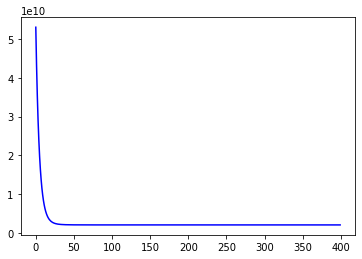

In [41]:
plt.plot(np.arange(400),cost_history,'b-')

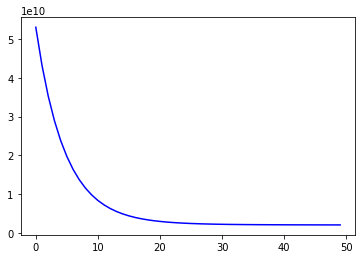

In [42]:
plt.plot(np.arange(50),cost_history[:50],'b-')#Zooming into the 50 iterations timeline

In [43]:
#Normal method
predicted,best_theta = normal_method(X_new1,y1)
best_theta # negative theta for no of bedrooms

array([[339119.45652174],
       [110248.92165868],
       [ -6226.22670553]])

In [0]:
# Estimate the price of a 1650 sq-ft, 3 br house
instance = [1,1650,3]
#normalize
instance[1:3] = (instance[1:3]-mu)/std
i = np.array(instance)

In [45]:
print("Predicted price of a 1650 sq-ft, 3 br house is (by GD)",i.dot(theta))
print("Predicted price of a 1650 sq-ft, 3 br house is (by normal method)",i.dot(best_theta))

Predicted price of a 1650 sq-ft, 3 br house is (by GD) [292195.80114586]
Predicted price of a 1650 sq-ft, 3 br house is (by normal method) [292195.80095132]
